In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width',None)

In [2]:
trans = pd.read_excel("QVI_transaction_data.xlsx")

cust = pd.read_csv("QVI_purchase_behaviour.csv")

In [3]:
trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
cust.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


###  Data Cleaning

#### Transaction Data:

In [5]:
# Check for nulls
print(trans.isnull().sum())

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [6]:
# Basic info
print(trans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None


 - Convert Object type to Date type for DATE column

In [7]:
trans['DATE'] = pd.to_datetime(trans['DATE'], origin='1899-12-30', unit='D')

In [8]:
# Check for outliers in quantity and price
trans[(trans['PROD_QTY'] < 0) & (trans['TOT_SALES'] < 0)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


In [9]:
# Check Duplicates
trans.duplicated().sum()

np.int64(1)

In [10]:
# Remove duplicates
trans = trans.drop_duplicates()

In [11]:
trans.shape

(264835, 8)

#### Customer Data:

In [12]:
# Nulls and info
print(cust.isnull().sum())

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [13]:
print(cust.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [14]:
# Check Duplicates
cust.duplicated().sum()

np.int64(0)

### Merge the Datasets

In [15]:
df = pd.merge(trans, cust, how='inner', on='LYLTY_CARD_NBR')

In [16]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


### Feature Engineering

In [17]:
# Extract pack size
df['PACK_SIZE'] = df['PROD_NAME'].str.extract(r'(\d+)\s?g', expand=False).astype(float)

In [18]:
# Extract brand
df['BRAND'] = df['PROD_NAME'].str.extract(r'^([^\s]+)')

In [19]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175.0,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175.0,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170.0,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,175.0,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,150.0,Kettle


In [20]:
df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'LIFESTAGE', 'PREMIUM_CUSTOMER',
       'PACK_SIZE', 'BRAND'],
      dtype='object')

### EDA

In [21]:
# Group by life stage and premium customer
segment_metrics = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

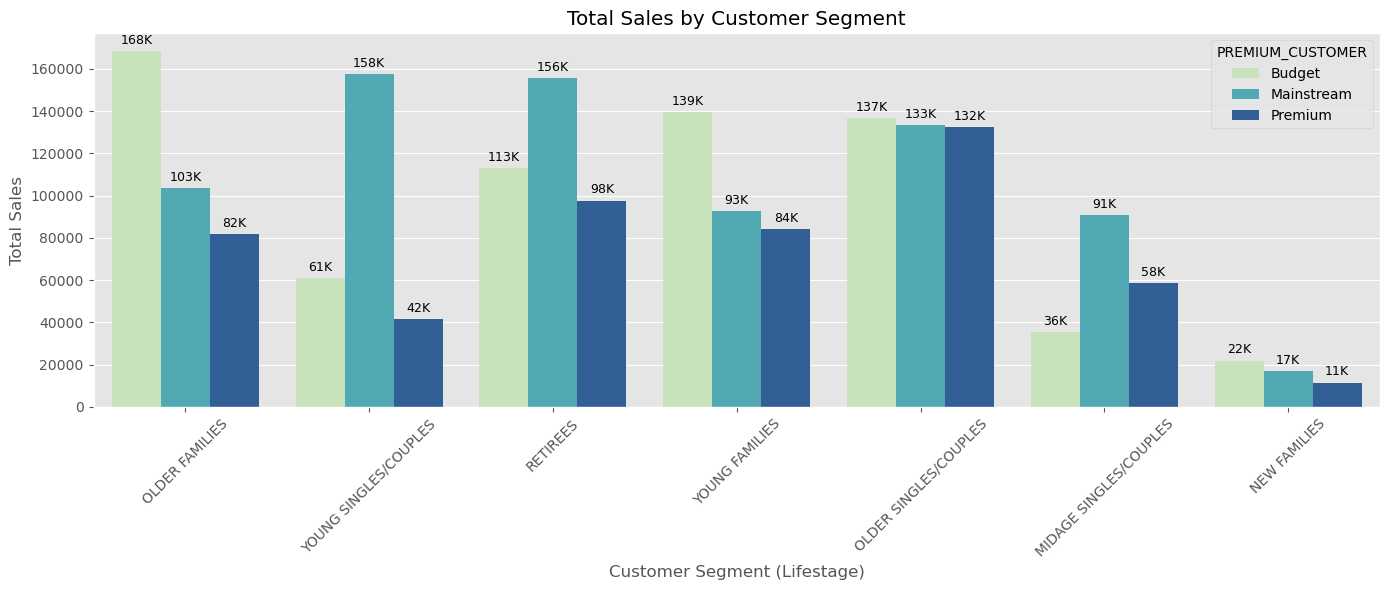

In [22]:
sales_plot = segment_metrics.sort_values(by='TOT_SALES', ascending=False)
plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data=sales_plot,
    x='LIFESTAGE',
    y='TOT_SALES',
    hue='PREMIUM_CUSTOMER',
    palette='YlGnBu'
)

def format_k_m(x):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.0f}K'
    else:
        return f'{x:.0f}'
for container in ax.containers:
    labels = [format_k_m(bar.get_height()) for bar in container]
    ax.bar_label(container, labels=labels, label_type='edge', padding=3, fontsize=9)

plt.title('Total Sales by Customer Segment')
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.xlabel("Customer Segment (Lifestage)")
plt.tight_layout()
plt.show()

In [23]:
avg_metrics = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])[['TOT_SALES', 'PROD_QTY', 'PACK_SIZE']].mean().reset_index()
avg_metrics.columns = ['Lifestage', 'Customer_Type', 'Avg_Spend', 'Avg_Quantity', 'Avg_Pack_Size']

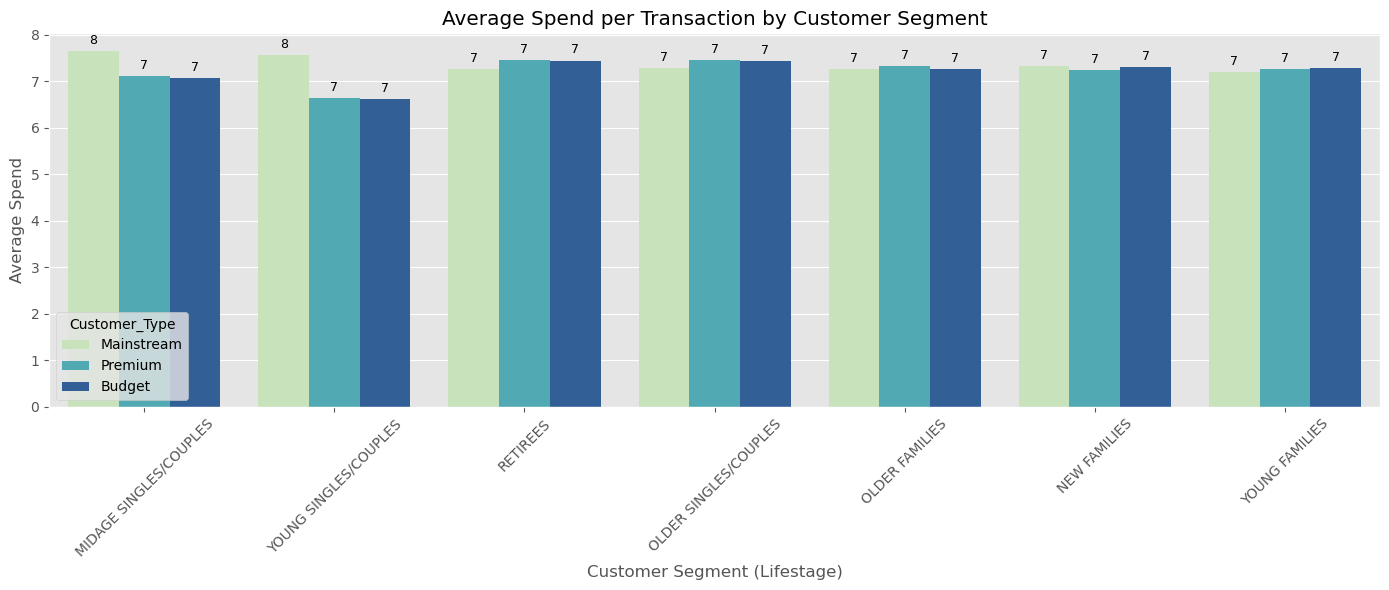

In [24]:
# Average Spend by Segment
plt.figure(figsize=(14, 6))
avg_spend_plot = avg_metrics.sort_values(by='Avg_Spend', ascending=False)
ax = sns.barplot(
    data=avg_spend_plot,
    x='Lifestage',
    y='Avg_Spend',
    hue='Customer_Type',
    palette='YlGnBu'
)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3, fontsize=9)
    
plt.title('Average Spend per Transaction by Customer Segment')
plt.xticks(rotation=45)
plt.ylabel("Average Spend")
plt.xlabel("Customer Segment (Lifestage)")
plt.tight_layout()
plt.show()

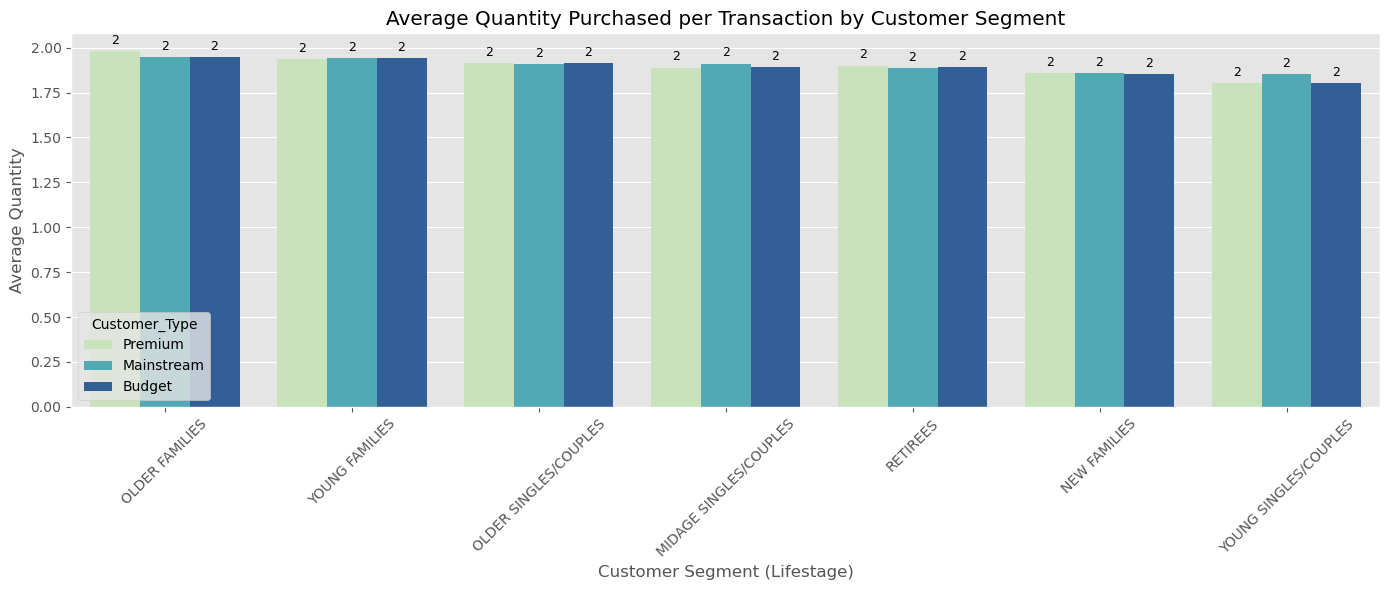

In [25]:
# Average Quantity by Segment
plt.figure(figsize=(14, 6))
quantity_plot = avg_metrics.sort_values(by='Avg_Quantity', ascending=False)
ax = sns.barplot(
    data=quantity_plot,
    x='Lifestage',
    y='Avg_Quantity',
    hue='Customer_Type',
    palette='YlGnBu'
)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3, fontsize=9)
    
plt.title('Average Quantity Purchased per Transaction by Customer Segment')
plt.xticks(rotation=45)
plt.ylabel("Average Quantity")
plt.xlabel("Customer Segment (Lifestage)")
plt.tight_layout()
plt.show()

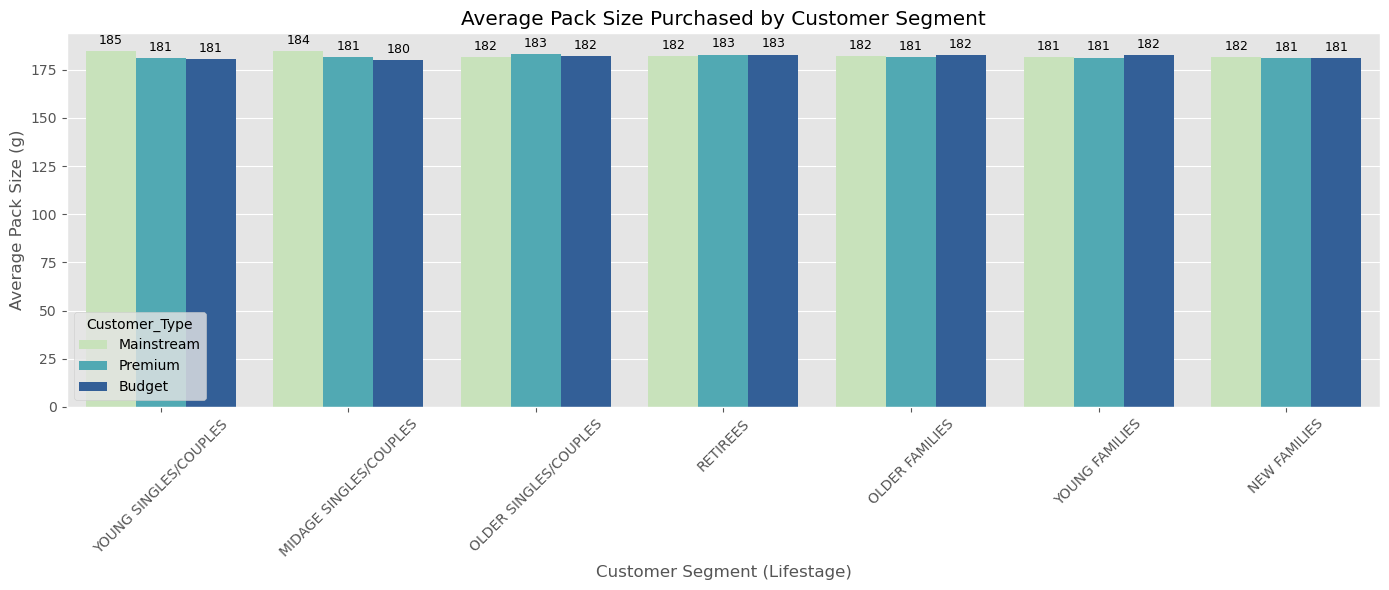

In [26]:
# Average Pack Size by Segment
plt.figure(figsize=(14, 6))
packsize_plot = avg_metrics.sort_values(by='Avg_Pack_Size', ascending=False)
ax = sns.barplot(
    data=packsize_plot,
    x='Lifestage',
    y='Avg_Pack_Size',
    hue='Customer_Type',
    palette= 'YlGnBu'
)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3, fontsize=9)
    
plt.title('Average Pack Size Purchased by Customer Segment')
plt.xticks(rotation=45)
plt.ylabel("Average Pack Size (g)")
plt.xlabel("Customer Segment (Lifestage)")
plt.tight_layout()
plt.show()

In [27]:
df.to_csv("cleaned_chip_data.csv", index=False)

## Customer Segmentation Insights

### **1. Who are the High Spenders?**

* The **top 5 customer segments by total chip sales** are:

  1. **OLDER FAMILIES - Budget**: `$168,363`
  2. **YOUNG SINGLES/COUPLES - Mainstream**: `$157,621`
  3. **RETIREES - Mainstream**: `$155,677`
  4. **YOUNG FAMILIES - Budget**: `$139,345`
  5. **OLDER SINGLES/COUPLES - Budget**: `$136,769`

**Insight**: Older families and singles/couples contribute significantly to chip sales, with budget segments being the top spenders.

---

### **2. Which Age Groups/Segments Buy the Most?**

* Based on **average quantity per transaction**:

  * **OLDER FAMILIES** (all price segments) have the **highest average quantity**, up to **1.98 units per transaction**.
  * **YOUNG FAMILIES** follow closely.

**Insight**: Families—especially older ones—tend to buy more chips per purchase, likely for household consumption.

---

### **3. What Price Point Do They Prefer (Premium, Budget)?**

* Across all top segments, **Budget and Mainstream** categories dominate.
* Premium segments like **OLDER FAMILIES - Premium** and **RETIREES - Premium** spend decently, but not the highest overall.

**Insight**: Budget and mainstream pricing are the most popular. Premium has specific appeal in **older or retired demographics**.

---

### **4. Are Families or Singles Buying More Chips?**

* Families (OLDER FAMILIES and YOUNG FAMILIES) dominate both in total spend and average quantity.
* Singles/couples (OLDER and MIDAGE) follow next.

**Insight**: Families are the **primary driver of volume** and value. Singles/couples contribute meaningfully but in smaller volumes.

---

### **5. Are Pack Sizes Different Across Segments?**

* The highest average pack size (\~185g) is seen in:

  * **YOUNG SINGLES/COUPLES - Mainstream**
  * **MIDAGE SINGLES/COUPLES - Mainstream**
* Families purchase slightly smaller average packs (\~182g), possibly more frequently or in bulk.

**Insight**: Singles/couples prefer larger packs per purchase. Families may buy more units but of standard sizes.

---

## Strategic Recommendations

Based on the above insights, here is a commercial strategy recommendation for Julia:

### **Target Young Families and Older Families with Value Packs**

* These groups **buy in larger quantities** and form the **top segments by volume and value**.
* **Introduce family-size packs** or **bundle offers** in budget and mainstream categories to increase basket size.

### **Promote Premium Brands to Older Singles/Couples and Retirees**

* These segments have **moderate total spend**, but their **average spend per transaction** and **preference for premium** are relatively high.
* Use **quality-oriented messaging** and **brand reputation** in targeted campaigns.

### **Launch Large Pack Variants for Singles/Couples (Especially Young & Midage)**

* These segments prefer **larger packs** and tend to buy **fewer units**, but with higher value.
* Provide **XL size options** or **limited-edition flavors** to create novelty and drive upsell.